<a href="https://colab.research.google.com/github/sppu33/DSBDAL/blob/main/dsbdal5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np


In [16]:
df=pd.read_csv("titanic.csv")

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
# note for mode we need to write [0] but not for median and mean

<ipython-input-22-b85474f1a1d7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)


In [23]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
df.shape

(891, 12)

In [25]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [26]:
df['Name'] = df['Name'].astype(pd.StringDtype())
df['Sex'] = df['Sex'].astype(pd.StringDtype())
df['Embarked'] = df['Embarked'].astype(pd.StringDtype())
df['Cabin'] = df['Cabin'].astype(pd.StringDtype())

In [27]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,string[python]
Sex,string[python]
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [28]:
df['Sex'].unique()

<StringArray>
['male', 'female']
Length: 2, dtype: string

In [29]:
df_encoded=pd.get_dummies(df,columns=['Sex'])
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,<NA>,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,<NA>,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,<NA>,S,False,True


{'whiskers': [<matplotlib.lines.Line2D at 0x7c55a4d8a490>,
 'caps': [<matplotlib.lines.Line2D at 0x7c55a4e37310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c55a4e31350>],
 'medians': [<matplotlib.lines.Line2D at 0x7c55a4e35950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c55aadf0b10>],
 'means': []}

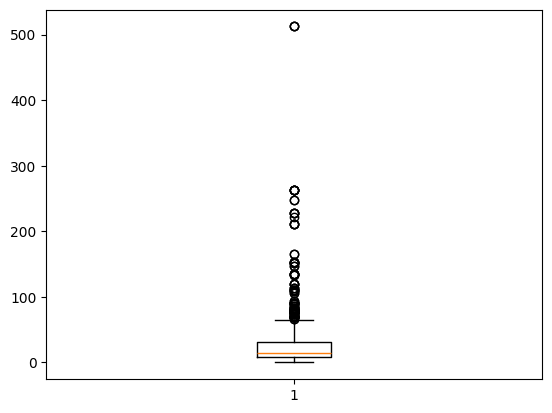

In [30]:
import matplotlib.pyplot as plt
plt.boxplot(df['Fare'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c55a2bac590>,
 'caps': [<matplotlib.lines.Line2D at 0x7c55a2bafed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c55a26b6910>],
 'medians': [<matplotlib.lines.Line2D at 0x7c55a23f1490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c55a23f1e50>],
 'means': []}

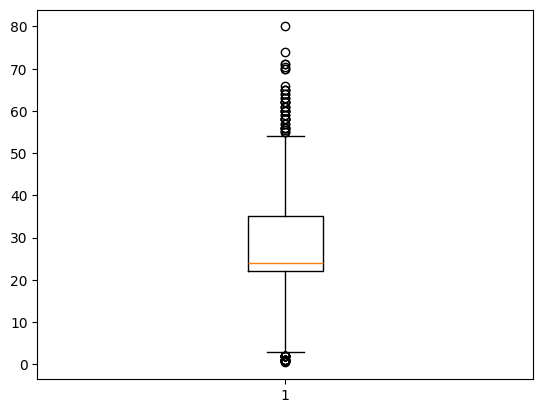

In [32]:
plt.boxplot(df['Age'])

In [33]:
import seaborn as sea

<Axes: xlabel='Sex', ylabel='Age'>

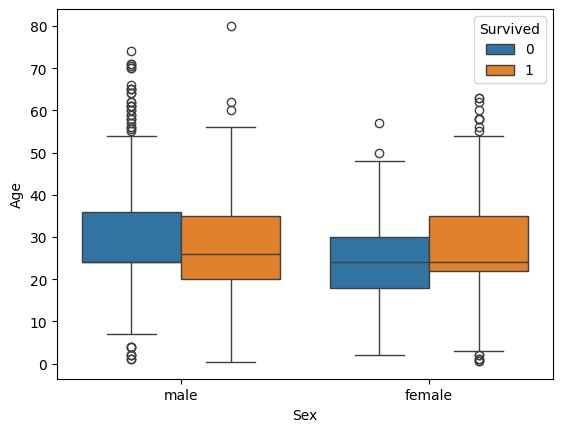

In [34]:
sea.boxplot(x='Sex',y='Age',hue='Survived', data=df)